# C-metric as a colliding plane wave space-time by Griffiths and Halburd
##  Geoff Cope
##  Univeristy of Utah
##  𐐏𐐭𐑌𐐲𐑂𐐲𐑉𐑅𐐮𐐻𐐨 𐐲𐑂 𐐏𐐭𐐻𐐫
##  January 21, 2022

https://arxiv.org/abs/gr-qc/0701061

The metric that appears as equation 6 in this paper corresponds to equation 6.3 page 132 of Barrabes and Hogan.  We derive the field equations listed there using the same numbering.  Need to do coordinate transformation for function U,V,M later

https://www.worldscientific.com/worldscibooks/10.1142/5454

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
u,v,x,y,du,dv,dx,dy = symbols('u v x y du dv dx dy')

In [4]:
M = Function('M')(u,v)
M

In [5]:
U = Function('U')(u,v)
U

In [6]:
V = Function('V')(u,v)
V

In [7]:
variables = Matrix([u,v,x,y])
variables

⎡u⎤
⎢ ⎥
⎢v⎥
⎢ ⎥
⎢x⎥
⎢ ⎥
⎣y⎦

In [8]:
differentials = Matrix([du,dv,dx,dy])
differentials 

⎡du⎤
⎢  ⎥
⎢dv⎥
⎢  ⎥
⎢dx⎥
⎢  ⎥
⎣dy⎦

In [9]:
lineElement = expand( -2*exp(-M)*du*dv + exp(-U) * (exp(V)*dx**2 +exp(-V)*dy**2) ) 
lineElement

In [10]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡              -M(u, v)                                         ⎤
⎢    0       -ℯ                  0                    0         ⎥
⎢                                                               ⎥
⎢  -M(u, v)                                                     ⎥
⎢-ℯ              0               0                    0         ⎥
⎢                                                               ⎥
⎢                         -U(u, v)  V(u, v)                     ⎥
⎢    0           0       ℯ        ⋅ℯ                  0         ⎥
⎢                                                               ⎥
⎢                                             -U(u, v)  -V(u, v)⎥
⎣    0           0               0           ℯ        ⋅ℯ        ⎦

In [11]:
import sympy

In [12]:
m = sympy.Array(g)
m

⎡              -M(u, v)                                         ⎤
⎢    0       -ℯ                  0                    0         ⎥
⎢                                                               ⎥
⎢  -M(u, v)                                                     ⎥
⎢-ℯ              0               0                    0         ⎥
⎢                                                               ⎥
⎢                         -U(u, v)  V(u, v)                     ⎥
⎢    0           0       ℯ        ⋅ℯ                  0         ⎥
⎢                                                               ⎥
⎢                                             -U(u, v)  -V(u, v)⎥
⎣    0           0               0           ℯ        ⋅ℯ        ⎦

In [13]:
from einsteinpy.symbolic import *

In [14]:
syms = sympy.symbols("u v x y")
u,v,x,y = syms

In [15]:
metric = MetricTensor(m,syms)

In [16]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡                                                                                                                                      
⎢⎡ ∂                                                                                                                                   
⎢⎢-──(M(u, v))  0                              0                                                           0                           
⎢⎢ ∂u                                                                                                                                  
⎢⎢                                                                                                                                     
⎢⎢     0        0                              0                                                           0                           
⎢⎢                                                                                                                                     
⎢⎢                 ⎛  ∂             ∂          ⎞

In [17]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                             2                               2                                                        
⎢                                ⎛∂          ⎞                   ⎛∂          ⎞            ∂           ∂             ∂           ∂      
⎢                                ⎜──(U(u, v))⎟      2            ⎜──(V(u, v))⎟            ──(U(u, v))⋅──(U(u, v))   ──(V(u, v))⋅──(V(u,
⎢      ∂           ∂             ⎝∂u         ⎠     ∂             ⎝∂u         ⎠            ∂u          ∂v            ∂u          ∂v     
⎢      ──(M(u, v))⋅──(U(u, v)) - ────────────── + ───(U(u, v)) - ──────────────         - ─────────────────────── - ───────────────────
⎢      ∂u          ∂u                  2            2                  2                             2                         2       
⎢                                                 ∂u                                                                                   
⎢                                               

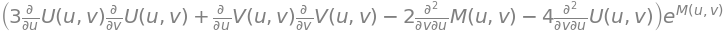

In [18]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [19]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                       2                               2                                                              
⎢                          ⎛∂          ⎞                   ⎛∂          ⎞                                                               
⎢                          ⎜──(U(u, v))⎟      2            ⎜──(V(u, v))⎟                                                  2            
⎢∂           ∂             ⎝∂u         ⎠     ∂             ⎝∂u         ⎠                     ∂           ∂               ∂             
⎢──(M(u, v))⋅──(U(u, v)) - ────────────── + ───(U(u, v)) - ──────────────                1.0⋅──(U(u, v))⋅──(U(u, v)) - ─────(U(u, v))  
⎢∂u          ∂u                  2            2                  2                           ∂u          ∂v            ∂v ∂u           
⎢                                           ∂u                                                                                         
⎢                                               

In [20]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [21]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [22]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡                                             2                               2                                                        
⎢                                ⎛∂          ⎞                   ⎛∂          ⎞            ∂           ∂             ∂           ∂      
⎢                                ⎜──(U(u, v))⎟      2            ⎜──(V(u, v))⎟            ──(U(u, v))⋅──(U(u, v))   ──(V(u, v))⋅──(V(u,
⎢      ∂           ∂             ⎝∂u         ⎠     ∂             ⎝∂u         ⎠            ∂u          ∂v            ∂u          ∂v     
⎢      ──(M(u, v))⋅──(U(u, v)) - ────────────── + ───(U(u, v)) - ──────────────         - ─────────────────────── - ───────────────────
⎢      ∂u          ∂u                  2            2                  2                             2                         2       
⎢                                                 ∂u                                                                                   
⎢                                               

In [23]:
einsteinSimplified = simplify(einst.tensor())
einsteinSimplified

⎡                                       2                               2                                                              
⎢                          ⎛∂          ⎞                   ⎛∂          ⎞                                                               
⎢                          ⎜──(U(u, v))⎟      2            ⎜──(V(u, v))⎟                                                  2            
⎢∂           ∂             ⎝∂u         ⎠     ∂             ⎝∂u         ⎠                     ∂           ∂               ∂             
⎢──(M(u, v))⋅──(U(u, v)) - ────────────── + ───(U(u, v)) - ──────────────                1.0⋅──(U(u, v))⋅──(U(u, v)) - ─────(U(u, v))  
⎢∂u          ∂u                  2            2                  2                           ∂u          ∂v            ∂v ∂u           
⎢                                           ∂u                                                                                         
⎢                                               

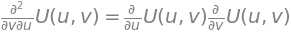

In [47]:
equation6pt4 = Eq( diff(U,u,v),solve(einsteinSimplified[1,0], diff(U,u,v) )[0])
equation6pt4

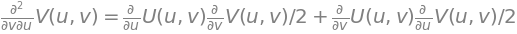

In [51]:
equation6pt5 = Eq( diff(V,u,v),solve( (ricciSimplified[2,2].args[0] - ricciSimplified[3,3].args[0]), diff(V,u,v) )[0] ) 
equation6pt5

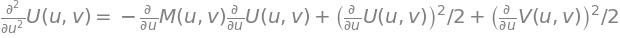

In [48]:
equation6pt6 = Eq(diff(U,u,u),solve( einsteinSimplified[0,0], diff(U,u,u) )[0])
equation6pt6

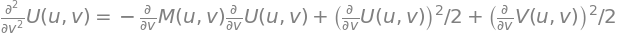

In [50]:
equation6pt7 = Eq(diff(U,v,v),solve( einsteinSimplified[1,1], diff(U,v,v) )[0])
equation6pt7

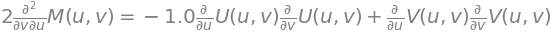

In [55]:
equation6pt8 = Eq(2*diff(M,u,v),2*solve( ( einsteinSimplified[2,2].args[0] + einsteinSimplified[3,3].args[0] ), diff(M,u,v) )[0].subs(equation6pt4.lhs,equation6pt4.rhs))
equation6pt8

In [57]:
vacuumFieldEquations = Matrix([equation6pt4,equation6pt5,equation6pt6,equation6pt7,equation6pt8])
vacuumFieldEquations

⎡                    2                                                     ⎤
⎢                   ∂              ∂           ∂                           ⎥
⎢                 ─────(U(u, v)) = ──(U(u, v))⋅──(U(u, v))                 ⎥
⎢                 ∂v ∂u            ∂u          ∂v                          ⎥
⎢                                                                          ⎥
⎢                     ∂           ∂             ∂           ∂              ⎥
⎢       2             ──(U(u, v))⋅──(V(u, v))   ──(U(u, v))⋅──(V(u, v))    ⎥
⎢      ∂              ∂u          ∂v            ∂v          ∂u             ⎥
⎢    ─────(V(u, v)) = ─────────────────────── + ───────────────────────    ⎥
⎢    ∂v ∂u                       2                         2               ⎥
⎢                                                                          ⎥
⎢                                                        2                2⎥
⎢                                           ⎛∂          ⎞    ⎛∂          ⎞ ⎥